In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def distance(*args):
    '''Works for small distances'''
    if len(args) == 2:
        lat1, lon1 = args[0]
        lat2, lon2 = args[1]
    if len(args) == 4:
        lat1, lon1, lat2, lon2 = args
    else:
        raise ValueError("requires 2 or 4 args")
    RADIUS = 6378137.0 # in meters on the equator
    CIRC = (2 * np.pi * RADIUS)
    dy = CIRC * (lat2-lat1)/360
#     at the poles differences in longitude imply 0 difference in distance
    lat_factor = (90-np.abs(lat1))/90
    dx = CIRC * (lon2-lon1)/360 * lat_factor
    return np.sqrt(dx**2 + dy**2)

In [3]:
fname = '../pi/data/2018-08-04.csv'
all_data = pd.read_csv(fname, sep='\t')
all_data.head()

,boat_COG,boat_lat,boat_lon,boat_speed,datetime,pressure,skiff_COG,skiff_lat,skiff_lon,skiff_speed,temp
0,66.020,60.8184,-148.152,0.2260,2018-08-04 05:58:10,99.2844,NaN,NaN,NaN,NaN,3.17640
1,79.444,60.8184,-148.152,0.2900,2018-08-04 05:58:11,99.3224,NaN,NaN,NaN,NaN,3.17445
2,82.132,60.8184,-148.152,0.2976,2018-08-04 05:58:16,99.3005,NaN,NaN,NaN,NaN,3.17445
3,49.684,60.8184,-148.152,0.3600,2018-08-04 05:58:21,99.3224,NaN,NaN,NaN,NaN,3.17445
4,351.715,60.8185,-148.152,0.4685,2018-08-04 05:58:43,99.3375,NaN,NaN,NaN,NaN,3.16666


Check to make sure all the data looks normal...

In [4]:
df = all_data[['datetime','boat_lat', 'boat_lon', 'skiff_lat', 'skiff_lon']]
df = df.dropna(how='any')
df['datetime'] = df['datetime'].apply(pd.datetime.strptime, args=("%Y-%m-%d %H:%M:%S",))
df['date'] = df['datetime'].apply(pd.datetime.date)
df['time'] = df['datetime'].apply(pd.datetime.time)
df.describe()

,boat_lat,boat_lon,skiff_lat,skiff_lon
count,4544.000000,4544.000000,4.544000e+03,4.544000e+03
mean,60.764087,-148.129879,6.055803e+01,-1.480683e+02
std,0.018515,0.043649,1.594632e+00,2.554269e+00
min,60.751366,-148.172755,1.346820e-34,-1.481728e+02
25%,60.755608,-148.145522,6.075606e+01,-1.481469e+02
50%,60.756311,-148.143378,6.075684e+01,-1.481448e+02
75%,60.757431,-148.140129,6.075733e+01,-1.481406e+02
max,60.819300,-147.979829,6.081860e+01,4.623070e-33


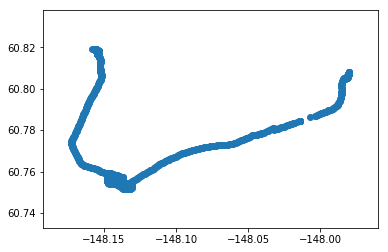

In [5]:
plt.scatter(df['boat_lon'], df['boat_lat'])

The boat location data looks great, but the skiff stuff looks al weird. Filter all the obvious errors

In [6]:
df = df[df['skiff_lat'] > 59]
df = df[df['skiff_lon'] < -146]
df.describe()

,boat_lat,boat_lon,skiff_lat,skiff_lon
count,4425.000000,4425.000000,4425.000000,4425.000000
mean,60.764093,-148.130001,60.764274,-148.130797
std,0.018534,0.043384,0.018441,0.043669
min,60.751366,-148.172755,60.680738,-148.172843
25%,60.755617,-148.145526,60.756138,-148.146921
50%,60.756312,-148.143386,60.756881,-148.144791
75%,60.757431,-148.140130,60.757354,-148.140615
max,60.819100,-147.979829,60.818600,-147.979900


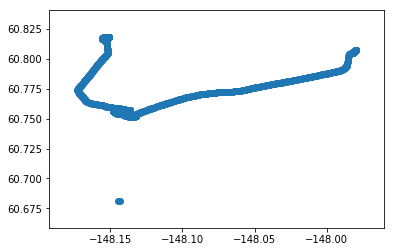

In [7]:
plt.scatter(df['skiff_lon'], df['skiff_lat'])

There's still that one outlier...

,boat_lat,boat_lon,skiff_lat,skiff_lon
count,4423.000000,4423.000000,4423.000000,4423.000000
mean,60.764096,-148.129995,60.764312,-148.130791
std,0.018537,0.043393,0.018359,0.043678
min,60.751366,-148.172755,60.751412,-148.172843
25%,60.755614,-148.145526,60.756142,-148.146921
50%,60.756312,-148.143385,60.756881,-148.144791
75%,60.757431,-148.140127,60.757354,-148.140612
max,60.819100,-147.979829,60.818600,-147.979900


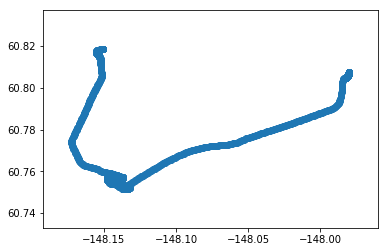

In [8]:
df = df[df['skiff_lat'] > 60.725]
plt.scatter(df['skiff_lon'], df['skiff_lat'])
df.describe()

In [9]:
df['separation'] = distance(df['boat_lat'], df['boat_lon'], df['skiff_lat'], df['skiff_lon'])

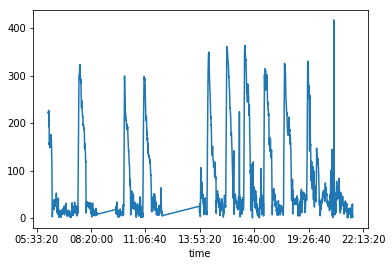

In [10]:
plt.plot(df['time'], df['separation'])
plt.show()

In [11]:
sep = df['separation']